# Homework 5: Weather Prediction

## Due Tues Mar 8, 2022 @ 8 pm

## Casey Lam, casey_lam@berkeley.edu

## Collaborators: #hw5-discussion channel

In this assignment we will create a database to analyze historical weather data and discovery the relationships between major cities.

### 1) Use the data supplied of airport codes (ICAO_airports.csv) and top airports (top_airports.csv) to make a table of 50 most travelled airports in the US and containing relevant information, like name, wikipedia link, latitude, longitude.

In [1]:
import pandas as pd
import sqlite3

Load up the supplied data and take a look at what's in the tables.

In [2]:
icao = pd.read_csv('ICAO_airports.csv')
top = pd.read_csv('top_airports.csv')

In [3]:
icao.head(5)

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN,NaN,NaN
1,6524,00AK,small_airport,Lowell Field,59.949200,-151.695999,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
2,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN
3,6526,00AR,heliport,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NaN,US,US-AR,Newport,no,00AR,NaN,00AR,NaN,NaN,NaN
4,6527,00AZ,small_airport,Cordes Airport,34.305599,-112.165001,3810.0,NaN,US,US-AZ,Cordes,no,00AZ,NaN,00AZ,NaN,NaN,NaN


In [4]:
top.head(5)

,City,FAA,IATA,ICAO,Airport,Role,Enplanements
0,Atlanta,ATL,ATL,KATL,Hartsfield-Jackson Atlanta International Airport,P-L,43130585
1,Chicago,ORD,ORD,KORD,Chicago O'Hare International Airport,P-L,32171831
2,Los Angeles,LAX,LAX,KLAX,Los Angeles International Airport,P-L,30528737
3,Dallas-Fort Worth,DFW,DFW,KDFW,Dallas/Fort Worth International Airport,P-L,27100656
4,Denver,DEN,DEN,KDEN,Denver International Airport,P-L,25241962


Create the database, make two tables (icao, top), and put the relevant information from each csv file into the tables. 

In [5]:
# !rm airports.db

# connection = sqlite3.connect("airports.db")

# cursor = connection.cursor()

# sql_cmd = """CREATE TABLE icao 
#             (iid INTEGER  NOT NULL  PRIMARY KEY  AUTOINCREMENT DEFAULT 0, 
#             name TEXT, 
#             wikipedia_link TEXT, 
#             iata TEXT, 
#             latitude_deg FLOAT, 
#             longitude_deg FLOAT)"""

# cursor.execute(sql_cmd)

# sql_cmd = """CREATE TABLE top 
#             (tid INTEGER  NOT NULL  PRIMARY KEY  AUTOINCREMENT DEFAULT 0, 
#             name TEXT, 
#             iata TEXT)"""

# cursor.execute(sql_cmd)
# connection.commit()

In [6]:
# icao = icao.where(pd.notnull(icao), None)
# for ii, row in icao.iterrows():
#     iparams = (row['name'], row['wikipedia_link'], row['iata_code'], row['latitude_deg'], row['longitude_deg'])
#     sql_cmd = """INSERT INTO icao
#                 (name, wikipedia_link, iata, latitude_deg, longitude_deg)
#                 VALUES (?, ?, ?, ?, ?)"""
    
#     cursor.execute(sql_cmd, iparams)
# connection.commit()

In [7]:
# top = top.where(pd.notnull(top), None)
# for ii, row in top.iterrows():
#     iparams = (row['Airport'], row['IATA'])
#     sql_cmd = """INSERT INTO top
#                 (name, iata)
#                 VALUES (?, ?)"""
    
#     cursor.execute(sql_cmd, iparams)
# connection.commit()    

In [8]:
#########
# Just to see what happens.
#########

# sql_cmd = "SELECT * FROM icao WHERE longitude_deg > 0"
# cursor.execute(sql_cmd)

# db_info = cursor.fetchall()
# for entry in db_info:
#     print(entry)

Now use left join and save the output as a new table called icao_top, which now is a table of the 50 most travelled airports in the US containing the airport name, IATA, wikipedia link, latitude, and longitude.

In [9]:
# sql_cmd = """CREATE TABLE icao_top AS
#             SELECT top.name, top.iata, icao.wikipedia_link, icao.latitude_deg, icao.longitude_deg
#             FROM top LEFT JOIN icao ON
#             top.iata = icao.iata"""

# cursor.execute(sql_cmd)
# connection.commit()

In [10]:
# #########
# # Just to make sure it worked.
# #########

# sql_cmd = "SELECT * FROM icao_top"

# cursor.execute(sql_cmd)

# db_info = cursor.fetchall()
# print(len(db_info))
# for entry in db_info: 
#     print(entry)

### 2) Build another table that will hold historical weather information: min/max temperature, relative humidity, and precipitation.

In [11]:
# sql_cmd = """CREATE TABLE weather
#             (wid INTEGER  NOT NULL  PRIMARY KEY  AUTOINCREMENT DEFAULT 0, 
#             date DATE,
#             lat FLOAT,
#             long FLOAT,
#             min_temp FLOAT,
#             max_temp FLOAT,
#             min_relhumid FLOAT,
#             max_relhumid FLOAT,
#             precip FLOAT)"""
# cursor.execute(sql_cmd)
# connection.commit()

### 3) Using the data from the xarray/netCDF4 example in class, populate the database from 1990-2000.

In [12]:
import xarray as xr
import numpy as np

Grab all the data we want (min/max temp, relative humidity, precipitation) from the online catalog.

In [13]:
# temp: tasmax/tasmin, RH: rhsmax/rhsmin, precipitation: pr
# downward shortwave solar radiation(rsds), eastward wind(uas), 
# northward wind(vas), and specific humidity(huss)

datatype = "tasmax" 

data_path = ("http://thredds.northwestknowledge.net:8080/"
             f"thredds/dodsC/agg_macav2metdata_{datatype}"
             "_BNU-ESM_r1i1p1_historical_1950_2005_CONUS_daily.nc")

max_temp_xr_all = xr.open_dataset(data_path)  
max_temp_xr = max_temp_xr_all['air_temperature'].sel(time=slice("1990", "2000"))

In [14]:
datatype = "tasmin" 

data_path = ("http://thredds.northwestknowledge.net:8080/"
             f"thredds/dodsC/agg_macav2metdata_{datatype}"
             "_BNU-ESM_r1i1p1_historical_1950_2005_CONUS_daily.nc")

min_temp_xr_all = xr.open_dataset(data_path)  
min_temp_xr = min_temp_xr_all['air_temperature'].sel(time=slice("1990", "2000"))

In [15]:
datatype = "rhsmax" 

data_path = ("http://thredds.northwestknowledge.net:8080/"
             f"thredds/dodsC/agg_macav2metdata_{datatype}"
             "_BNU-ESM_r1i1p1_historical_1950_2005_CONUS_daily.nc")

max_rhum_xr_all = xr.open_dataset(data_path) 
max_rhum_xr = max_rhum_xr_all['relative_humidity'].sel(time=slice("1990", "2000"))

In [16]:
datatype = "rhsmin" 

data_path = ("http://thredds.northwestknowledge.net:8080/"
             f"thredds/dodsC/agg_macav2metdata_{datatype}"
             "_BNU-ESM_r1i1p1_historical_1950_2005_CONUS_daily.nc")

min_rhum_xr_all = xr.open_dataset(data_path) 
min_rhum_xr = min_rhum_xr_all['relative_humidity'].sel(time=slice("1990", "2000"))

In [17]:
datatype = "pr" 

data_path = ("http://thredds.northwestknowledge.net:8080/"
             f"thredds/dodsC/agg_macav2metdata_{datatype}"
             "_BNU-ESM_r1i1p1_historical_1950_2005_CONUS_daily.nc")

precip_xr_all = xr.open_dataset(data_path) 
precip_xr = precip_xr_all['precipitation'].sel(time=slice("1990", "2000"))

Just get the longitudes and latitudes that match, otherwise it will take forever to make the database.

In [20]:
connection = sqlite3.connect("airports.db")

cursor = connection.cursor()

In [21]:
lon_arr = np.zeros(50)
lat_arr = np.zeros(50)
# Fix... figure out how to save this.
sql_cmd = "SELECT latitude_deg, longitude_deg FROM icao_top"

cursor.execute(sql_cmd)
db_info = cursor.fetchall()
print(len(db_info))
for ii, entry in enumerate(db_info): 
    lat_arr[ii] = entry[0]
    lon_arr[ii] = entry[1]

50


[24]
[24 35]


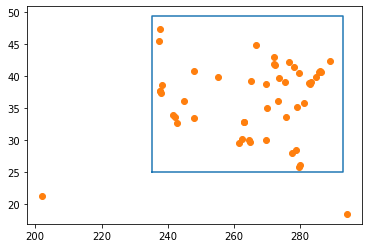

In [22]:
lon_idx_arr = []
lat_idx_arr = []

for ii, lon in enumerate(lon_arr):
    lon_idx_arr.append(np.abs(precip_xr['lon'].values - (lon + 360)).argmin())

for ii, lat in enumerate(lat_arr):
    lat_idx_arr.append(np.abs(precip_xr['lat'].values - lat).argmin())
    
# Note there are two places they don't match up. It's obvious when plotting.
#np.diff(precip_xr['lat']).mean()
#np.diff(precip_xr['lon']).mean()
print(np.where(precip_xr['lon'].values[lon_idx_arr] - (lon_arr + 360) > 0.04)[0])
print(np.where(precip_xr['lat'].values[lat_idx_arr] - lat_arr > 0.04)[0])

lonidx = np.where(precip_xr['lon'].values[lon_idx_arr] - (lon_arr + 360) > 0.04)[0]
latidx = np.where(precip_xr['lat'].values[lat_idx_arr] - lat_arr > 0.04)[0]

import matplotlib.pyplot as plt

plt.plot([precip_xr['lon'].min(), precip_xr['lon'].min(), precip_xr['lon'].max(), precip_xr['lon'].max(), precip_xr['lon'].min()],
         [precip_xr['lat'].min(), precip_xr['lat'].max(), precip_xr['lat'].max(), precip_xr['lat'].min(), precip_xr['lat'].min()])
plt.plot(lon_arr + 360, lat_arr, 'o')

In [23]:
# float(min_temp_xr.isel(lon=500, lat=500).values[0])

Put into database.

In [24]:
# # ~1000 seconds to write the table.
# import time
# t1 = time.time()
# for ii in np.arange(50):
#     lon_idx = lon_idx_arr[ii]
#     lat_idx = lat_idx_arr[ii]
#     lat = min_temp_xr.isel(lon=lon_idx, lat=lat_idx)['lat'].values
#     lon = min_temp_xr.isel(lon=lon_idx, lat=lat_idx)['lon'].values
#     min_temp = min_temp_xr.isel(lon=lon_idx, lat=lat_idx).values
#     max_temp = max_temp_xr.isel(lon=lon_idx, lat=lat_idx).values
#     min_rhum = min_rhum_xr.isel(lon=lon_idx, lat=lat_idx).values
#     max_rhum = max_rhum_xr.isel(lon=lon_idx, lat=lat_idx).values
#     precip = precip_xr.isel(lon=lon_idx, lat=lat_idx).values
#     for jj, time_xr in enumerate(precip_xr['time']):
#         params = (str(time_xr.dt.strftime('%Y-%m-%d').values),
#                   float(lat_arr[ii]),
#                   float(lon_arr[ii]),
#                   float(min_temp[jj]),
#                   float(max_temp[jj]),
#                   float(min_rhum[jj]),
#                   float(max_rhum[jj]),
#                   float(precip[jj]))
#         sql_cmd = """INSERT INTO weather
#                     (date, lat, long, min_temp, max_temp, min_relhumid, max_relhumid, precip)
#                     VALUES (?, ?, ?, ?, ?, ?, ?, ?)"""
# # Need to add lat, lon    
    
#         cursor.execute(sql_cmd, params)
# connection.commit()
# t2 = time.time()

# print(t2 - t1)

In [25]:
print(lat_arr[0], lon_arr[0])
print(lat_arr[1], lon_arr[1])

33.6366996765137 -84.4281005859375
41.97859955 -87.90480042


In [26]:
max_temp1 = np.empty((50, 4018))
max_temp2 = np.empty((50, 4018))

precip1 = np.empty((50, 4018))
precip2 = np.empty((50, 4018))

for ii in np.arange(50):
    sql_cmd = "SELECT max_temp, precip FROM weather WHERE lat={0} AND long={1}".format(lat_arr[ii], lon_arr[ii])
    cursor.execute(sql_cmd)

    db_info = cursor.fetchall()
    for ee, entry in enumerate(db_info):
        max_temp1[ee] = entry[0]
        precip1[ee] = entry[1]
    
print(np.corrcoef(np.diff(max_temp1), np.diff(max_temp2))[0,1])
print(np.corrcoef(np.diff(max_temp1)[1:], np.diff(max_temp2)[:-1])[0,1])
print(np.corrcoef(np.diff(max_temp1)[3:], np.diff(max_temp2)[:-3])[0,1])
print(np.corrcoef(np.diff(max_temp1)[7:], np.diff(max_temp2)[:-7])[0,1])

0.2608908219791711
0.4570341753727899
-0.14685553268355958
-0.0017091775993104714


### 4) For each pair of cities/airports determine how the daily change of temperature high and precipitation from one city predicts the daily change of the other city 1, 3, & 7 days in advance. (Note: for correlations between pairs, try np.corrcoef.)

In [ ]:
sql_cmd = "SELECT latitude_deg FROM icao_top"
cursor.execute(sql_cmd)

db_info = cursor.fetchall()
for entry in db_info: 
    print(entry[0])

In [ ]:
sql_cmd = "SELECT latitude_deg FROM icao_top"

cursor.execute(sql_cmd)

db_info = cursor.fetchall()
for entry in db_info: 
    print(entry[0])

In [ ]:
sql_cmd = "SELECT * FROM weather WHERE lat = 33.6366996765137"
cursor.execute(sql_cmd)

In [ ]:
db_info = cursor.fetchall()
for entry in db_info: 
    print(entry)

In [ ]:
# Just to see what happens.
sql_cmd = "SELECT * FROM icao WHERE latitude_deg = 33.6366996765137"
cursor.execute(sql_cmd)

db_info = cursor.fetchall()
for entry in db_info:
    print(entry)

In [ ]:
import numpy as np 
np.corrcoef

### 5) Plot the correlation strengths for the 10 top pairs for all three dates, for temperature and precipitation (separately) as a function of distance. Also make a plot as a function of longitude different. What trends do you see?